In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [ ]:
df = pd.read_csv("./world-population-by-country-2020.csv")

In [ ]:
df.shape

(235, 12)

In [ ]:
df.head()

,no,Country (or dependency),Population 2020,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       235 non-null    int64 
 1   Country (or dependency)  235 non-null    object
 2   Population 2020          235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density  (P/Km²)         235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           201 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


Заменим в столбце 'Density  (P/Km²)' тип с 'object' на 'int64'. Но сначала уберём запятые, которые не дадут сменить тип

In [ ]:
df['Density (P/Km²)'] = df['Density  (P/Km²)'].replace(',','', regex=True).sort_values(ascending=True).astype(int).astype(str)

In [ ]:
df['Density (P/Km²)'] = df['Density (P/Km²)'].astype(int)

In [ ]:
df['Density (P/Km²)'].dtype

dtype('int64')

**Вычислим выборочное среднее**

In [ ]:
sample_mean = df['Density (P/Km²)'].mean()
sample_mean

478.40851063829786

Перепроверим себя, вычислив по другому

In [ ]:
df['Density (P/Km²)'].shape[0]

235

In [ ]:
df['Density (P/Km²)'].sum()/df['Density (P/Km²)'].shape[0]

478.40851063829786

**Вычислим выборочную дисперсию**

In [ ]:
simple_variance = df['Density (P/Km²)'].var()
simple_variance

5434877.738388797

Перепроверим себя, вычислив по другому

In [ ]:
((df['Density (P/Km²)'] - sample_mean)**2).sum()/df['Density (P/Km²)'].shape[0]

5411750.599076505

Как видим, встроенная функция var() вычисляет несмещенную дисперсию, поэтому и мы сделаем так же, вычтив 1 из n в знаменателе

In [ ]:
((df['Density (P/Km²)'] - sample_mean)**2).sum()/(df['Density (P/Km²)'].count() - 1)

5434877.738388797

**Вычислим выборочный квантиль уровня альфа**

Преобразуем нашу выборку в список для представления вариацинного ряда выборки

In [ ]:
variation_series = list(df['Density (P/Km²)'])
variation_series.sort()

Теперь вычислим выборочную квантиль уровня альфа

In [ ]:
alpha = 0.9
n = df['Density (P/Km²)'].shape[0]
element_of_variation_series = (n * alpha) + 1
el = round(element_of_variation_series)
sample_quantile = variation_series[el-1]
sample_quantile

541

**График выборочной функции распределения**

In [ ]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(235)

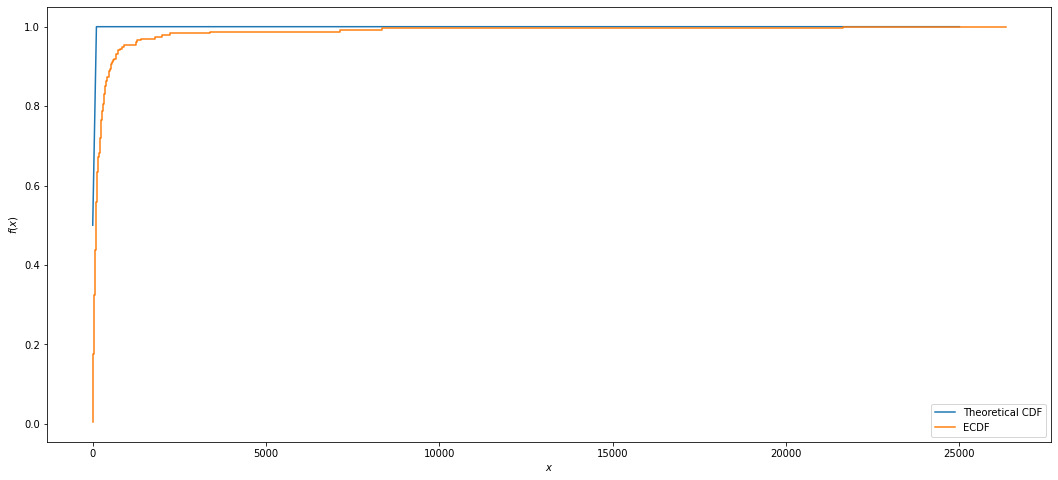

In [ ]:
plt.figure(figsize = (18, 8))
x = np.linspace(0,25000,235)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Theoretical CDF')

ecdf = ECDF(df['Density (P/Km²)'])
plt.step(ecdf.x, ecdf.y, label='ECDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='lower right')

**Гистограмма**

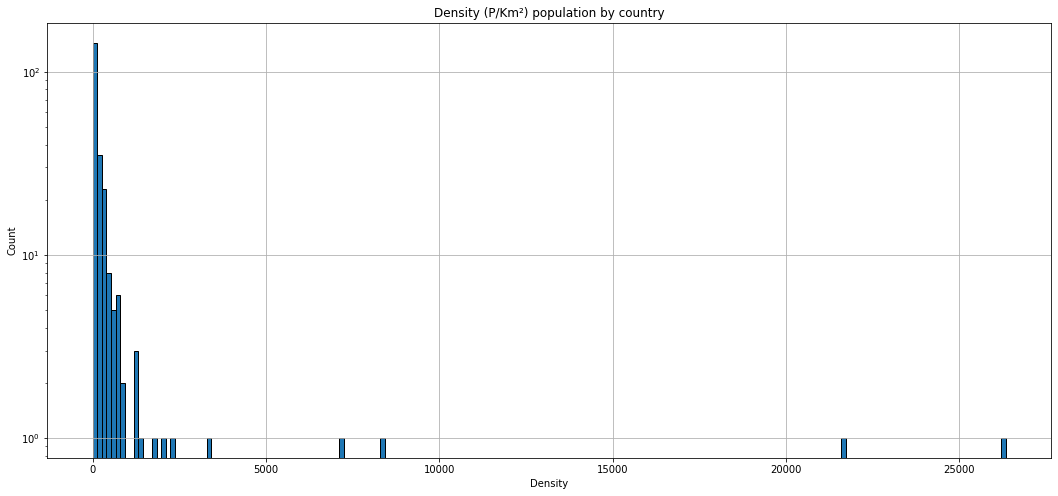

In [ ]:
plt.figure(figsize = (18, 8))
df['Density (P/Km²)'].hist(bins=200, ec="black", log=True)
plt.ylabel('Count')
plt.xlabel('Density')
plt.title('Density (P/Km²) population by country')
plt.show()

**Ядерная оценка плотности вероятности**

Text(0.5, 0, '$x$')

<Figure size 1296x576 with 0 Axes>

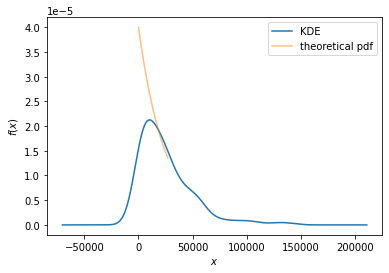

In [ ]:
norm_rv = sts.expon(0, 25000)
sample = norm_rv.rvs(235)
plt.figure(figsize = (18, 8))
data = pd.DataFrame(sample, columns=['KDE'])
ax = data.plot(kind='density')

x = np.linspace(0,27000,235)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

**Доверительный интервал или интервальные оценки**

In [ ]:
density_std = df['Density (P/Km²)'].std() 
density_std

2331.282423557643

In [ ]:
np.sqrt(simple_variance)

2331.282423557643

Вычислим двусторонний доверительный интервал для оценки математического ожидания с надежностью 0.9

In [ ]:
(sample_mean - 1.645 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()), sample_mean + 1.645 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

(228.2433308919011, 728.5736903846946)

либо через СКО

In [ ]:
(sample_mean - 1.645 * density_std / np.sqrt(df['Density (P/Km²)'].count()), sample_mean + 1.645 * density_std / np.sqrt(df['Density (P/Km²)'].count()))

(228.24333089190105, 728.5736903846946)

Вычислим двусторонний доверительный интервал для оценки математического ожидания с надежностью 0.95

In [ ]:
(sample_mean - 1.96 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()), sample_mean + 1.96 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

(180.33936030216557, 776.4776609744301)

Вычислим двусторонний доверительный интервал для оценки дисперсии с надежностью 0.9

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 182.034, simple_variance * (df['Density (P/Km²)'].count() - 1) / 270.684)

(6986394.798680348, 4698324.950063463)

Вычислим двусторонний доверительный интервал для оценки дисперсии с надежностью 0.95

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 193.524, simple_variance * (df['Density (P/Km²)'].count() - 1) / 278.262)

(6571595.206708101, 4570373.930982235)

Вычислим односторонний доверительный интервал для оценки математического ожидания с надежностью 0.9

In [ ]:
(sample_mean - 1.282 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

283.4469541429297

In [ ]:
(sample_mean + 1.283 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

673.5221432307762

Вычислим односторонний доверительный интервал для оценки математического ожидания с надежностью 0.95

In [ ]:
(sample_mean - 1.645 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

228.2433308919011

In [ ]:
(sample_mean + 1.645 * np.sqrt(simple_variance / df['Density (P/Km²)'].count()))

728.5736903846946

Вычислим односторонний доверительный интервал для оценки дисперсии с надежностью 0.9

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 182.034)

6986394.798680348

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 262.117)

4851884.428644378

Вычислим односторонний доверительный интервал для оценки дисперсии с надежностью 0.95

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 193.524)

6571595.206708101

In [ ]:
(simple_variance * (df['Density (P/Km²)'].count() - 1) / 270.684)

4698324.950063463